# **Predicting the City-Cycle Fuel Efficiency**

##**Exploratory Data Analyisis**

### Loading relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the CSV file and analyzing the data

In [2]:
import pandas as pd

df = pd.read_csv('auto-mpg.csv', sep = '\s+', header = None)

# Add a header
header_row = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df.columns = header_row

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# check for missing values
missing_values_qmark = df == '?'

# Count the number of missing values per column
missing_values_count = missing_values_qmark.sum()

missing_values_count

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [7]:
import numpy as np
# Replace '?' with NaN for easier handling
df = df.replace('?', np.nan)

# Drop rows with missing values
df_filtered = df.dropna()

print(f"Number of rows before dropping: {len(df)}")
print(f"Number of rows after dropping: {len(df_filtered)}")

print("This dataset has been cleaned and has no missing values")

Number of rows before dropping: 398
Number of rows after dropping: 392
This dataset has been cleaned and has no missing values


In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [9]:
# Get all column names except 'car_name'
cols_to_keep = [col for col in df_filtered.columns if col != 'car_name']

# Create a new DataFrame excluding the 'car_name' column
df_filtered = df_filtered[cols_to_keep]

print(df_filtered)


      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model_year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70  

In [10]:
df_filtered.horsepower = df_filtered.horsepower.astype(np.float64)

<ipython-input-10-f51f3eb69cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.horsepower = df_filtered.horsepower.astype(np.float64)


In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


##**Dataset preperation for regression**

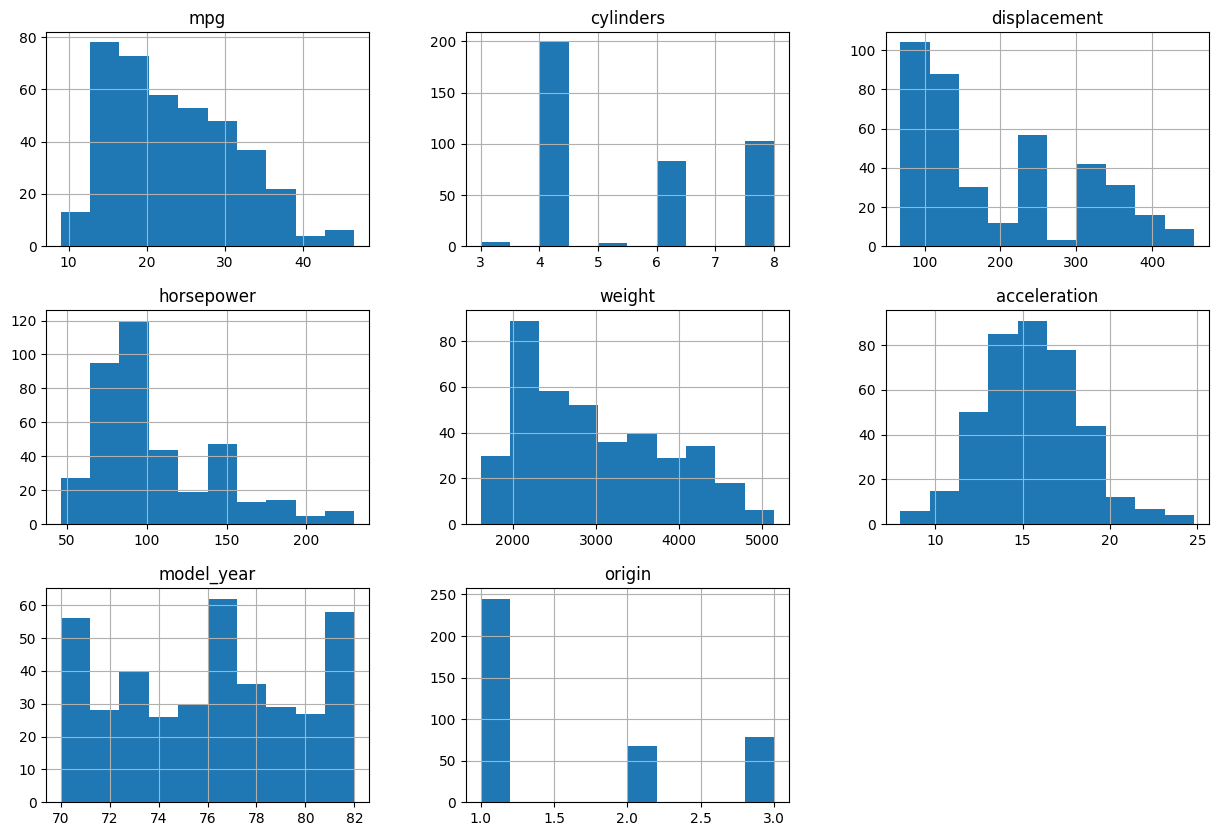

In [12]:
df_filtered.hist(bins = 10, figsize = (15,10))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [13]:
df_filtered.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

## **Visualizing the relationship**

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model_year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

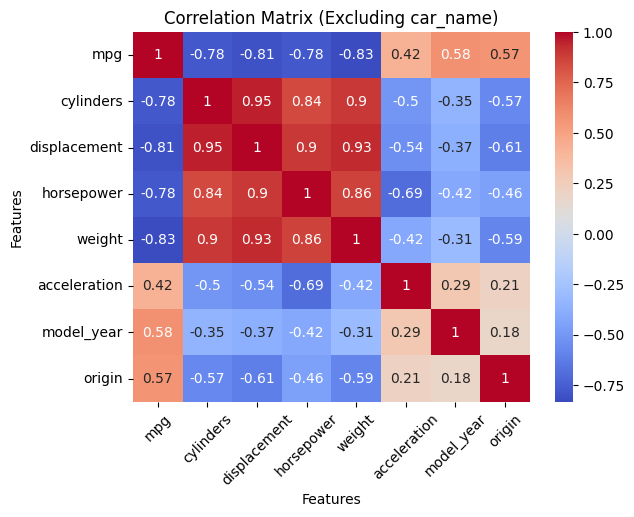

In [14]:
features = df_filtered.columns.tolist()

correlation_matrix = df_filtered[features].corr(method = 'pearson')

print(correlation_matrix)

import pandas as pd
import seaborn as sns  #heatmap

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title("Correlation Matrix (Excluding car_name)")
plt.xlabel("Features")
plt.ylabel("Features")

plt.xticks(rotation = 45)
plt.show()



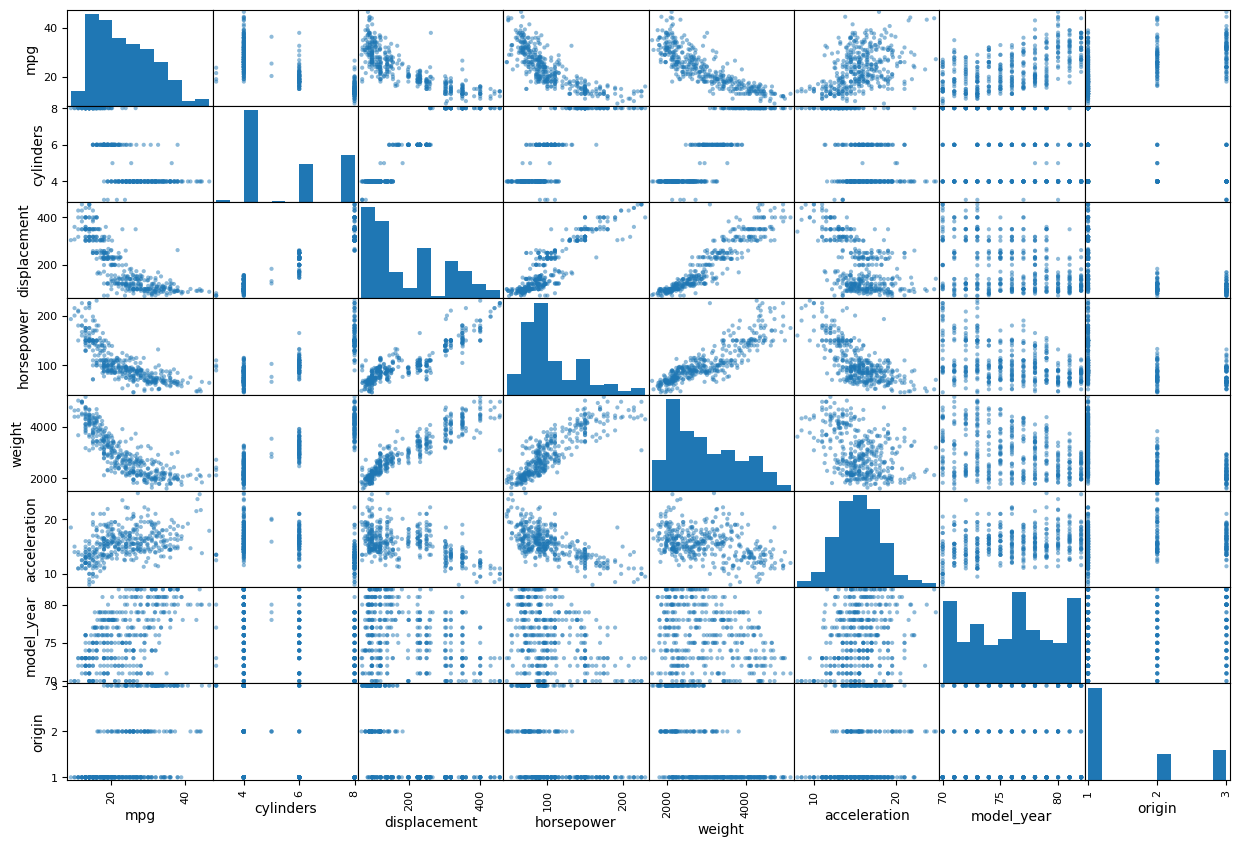

In [15]:
pd.plotting.scatter_matrix(df_filtered, figsize = (15, 10))
plt.show()

There are a few correlations:

Non-linear correlations.


The acceleration of the cars in the data is normally distributed and the most of the cars have an acceleration of 15 meters per second squared.

Half of the total number of cars (51.3%) in the data have 4 cylinders.

Our output/dependent variable (mpg) is slightly skewed to the right.

Here is an example:

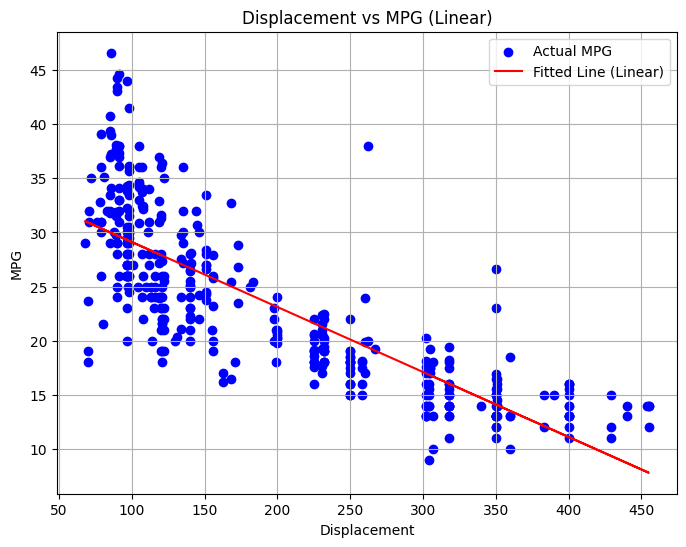

In [16]:
# example: Disaplacement vs mpg

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Linear

# Select displacement and mpg columns
displacement = df_filtered['displacement']
mpg = df_filtered['mpg']

model = LinearRegression()

model.fit(displacement.values.reshape(-1, 1), mpg)

# Predicted mpg values based on the fitted model
predicted_mpg = model.predict(displacement.values.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(displacement, mpg, color = 'blue', label = 'Actual MPG')
plt.plot(displacement, predicted_mpg, color = 'red', label = 'Fitted Line (Linear)')

plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('Displacement vs MPG (Linear)')
plt.grid(True)
plt.legend()
plt.show()


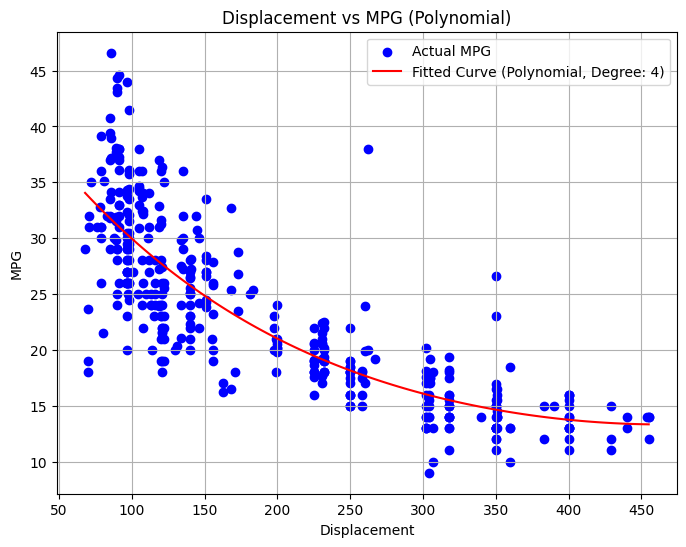

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Polynomial

displacement = df_filtered['displacement']
mpg = df_filtered['mpg']


coefs = np.polyfit(displacement, mpg, 4)

x_fit = np.linspace(min(displacement), max(displacement), 100)

y_fit = np.polyval(coefs, x_fit)

plt.figure(figsize=(8, 6))
plt.scatter(displacement, mpg, color = 'blue', label = 'Actual MPG')
plt.plot(x_fit, y_fit, color = 'red', label = f'Fitted Curve (Polynomial, Degree: 4)')


plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title(f'Displacement vs MPG (Polynomial)')
plt.grid(True)
plt.legend()
plt.show()




In [18]:
df_filtered.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## **ML Models**

**Datasets:**

- Regular dataset: *X*

- Standardized dataset: *X_std*

- PCA reduced dataset: *X_pca*

In [19]:
# Regular dataset

X = df_filtered.drop("mpg", axis = 1)
y = df_filtered["mpg"]

# Split it into 75% training and 25% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)



In [20]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [21]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [22]:
# Standardized dataset (X-mean/sd), where sd= standard deviation
import pandas as pd

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

X_train_std, X_test_std = train_test_split(X_std, test_size = 0.25, random_state = 42)



In [23]:
X_std.head()

,0,1,2,3,4,5,6
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [24]:
X_std.shape

(392, 7)

In [25]:
# PCA reduced dataset

from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=4)
X_pca = pd.DataFrame(pca.fit_transform(X_std))

X_train_pca, X_test_pca = train_test_split(X_pca, test_size = 0.25, random_state = 42)



In [26]:
X_pca.shape

(392, 4)

In [27]:
X_pca.head()

,0,1,2,3
0,2.643505,0.968121,0.545291,-0.416528
1,3.378677,1.095924,0.274991,-0.258551
2,2.992292,1.222173,0.246174,-0.553199
3,2.821985,1.062283,0.452004,-0.384343
4,2.869704,1.285961,0.194749,-0.700555


##**Data Visualization**

###Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2D_pca2 = pca2.fit_transform(X_std)

print('Number of samples and attributes: ', X_2D_pca2.shape)

Number of samples and attributes:  (392, 2)


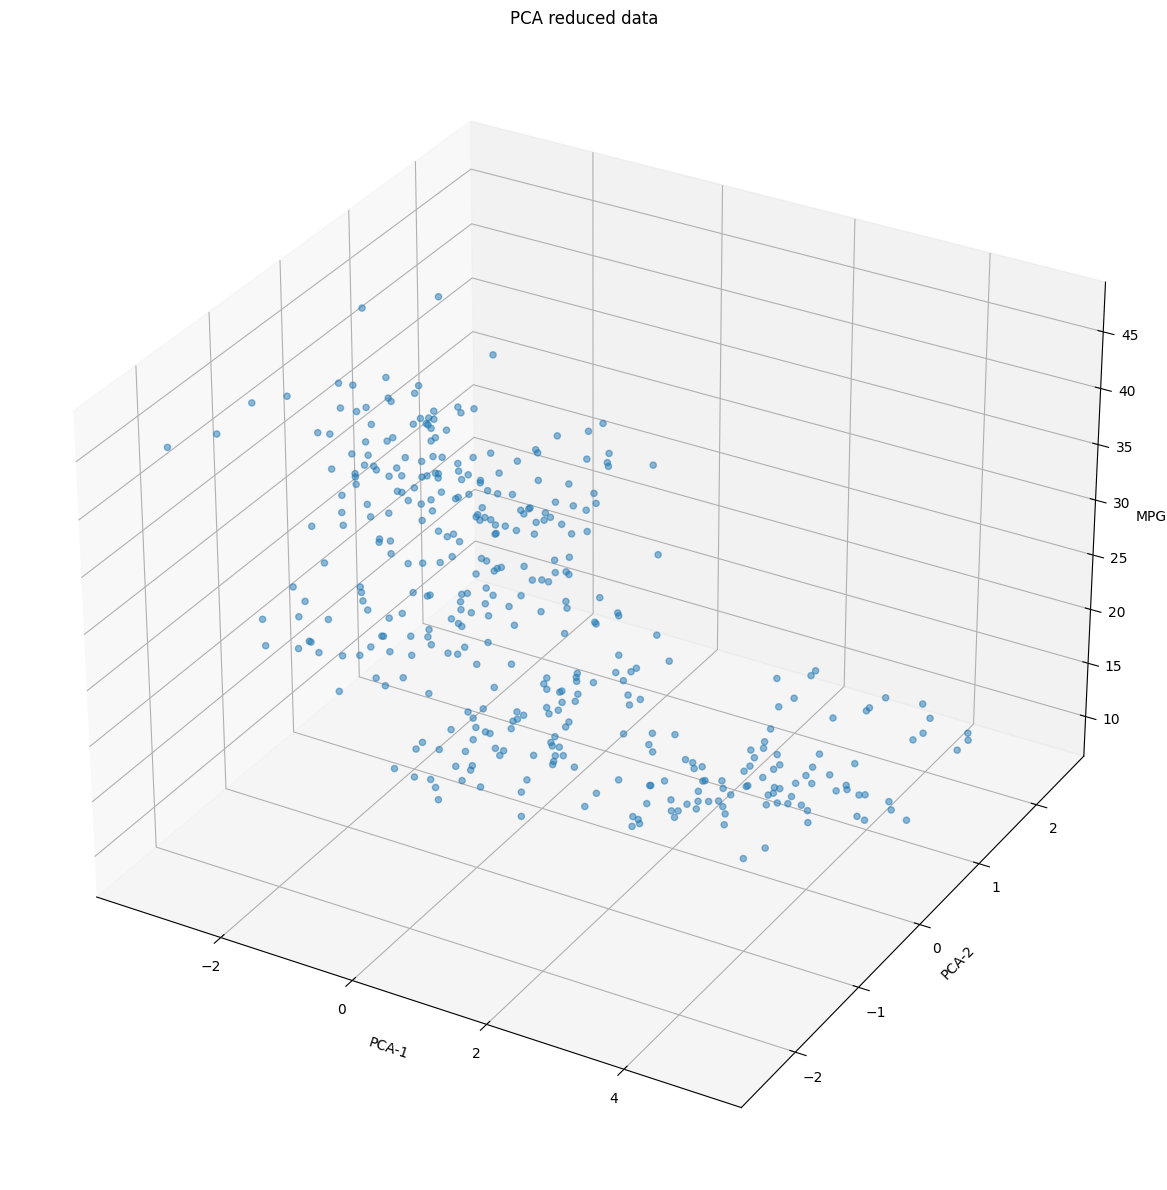

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection = '3d')

ax.scatter(X_2D_pca2[:, 0], X_2D_pca2[:, 1], y, alpha = 0.5);
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("MPG")

plt.title("PCA reduced data")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'MPG')

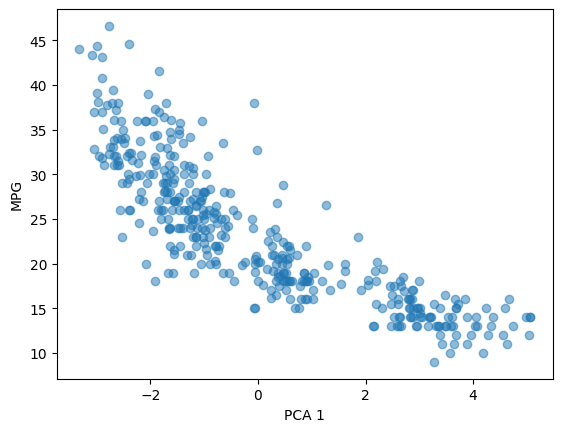

In [30]:
plt.scatter(X_2D_pca2[:, 0], y, alpha = 0.5)
plt.xlabel("PCA 1")
plt.ylabel("MPG")

Text(0, 0.5, 'MPG')

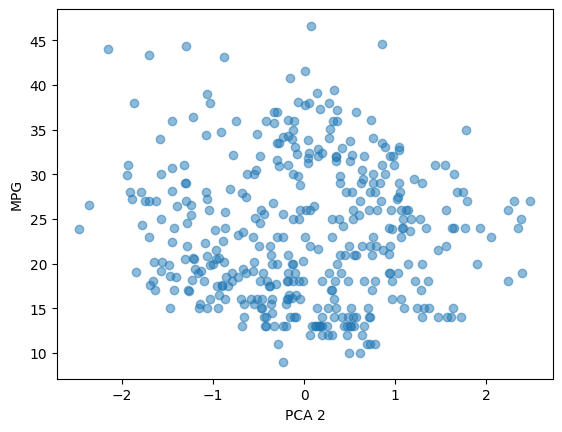

In [31]:
plt.scatter(X_2D_pca2[:, 1], y, alpha = 0.5)
plt.xlabel("PCA 2")
plt.ylabel("MPG")

###t-Distributed Stochastic Neighbour Embedding

In [32]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto')
X_2D_tsne2 = tsne2.fit_transform(X_pca)
print('Number of samples and attributes:', X_2D_tsne2.shape)

Number of samples and attributes: (392, 2)


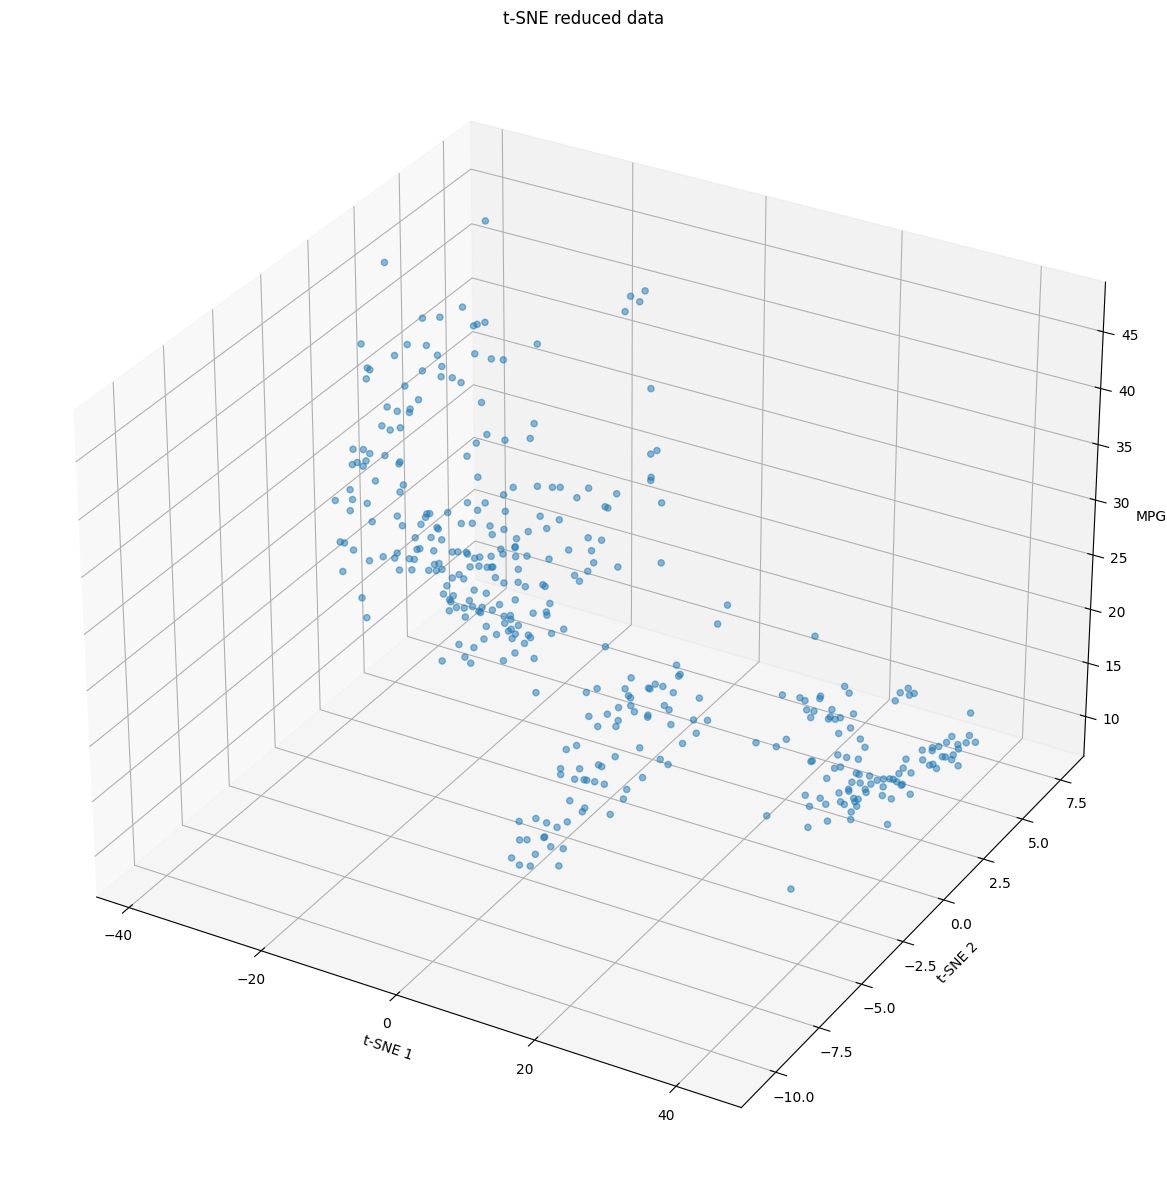

In [33]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection = '3d')

ax.scatter(X_2D_tsne2[:, 0], X_2D_tsne2[:, 1], y, alpha = 0.5);
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("MPG")

plt.title("t-SNE reduced data")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'MPG')

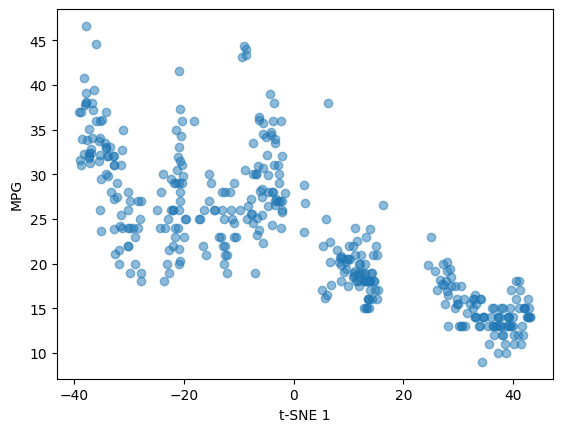

In [34]:
# 2D point cloud of the tSNE-1 feature against MPG
plt.scatter(X_2D_tsne2[:, 0], y, alpha = 0.5)
plt.xlabel("t-SNE 1")
plt.ylabel("MPG")

Text(0, 0.5, 'Critical Temp')

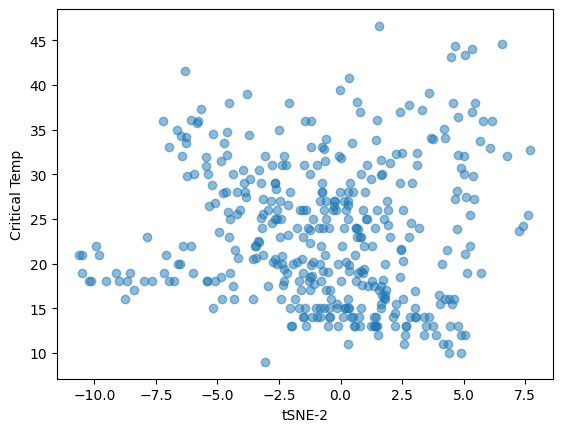

In [35]:
# tSNE-2 feature against the MPG
plt.scatter(X_2D_tsne2[:, 1], y, alpha = 0.5)
plt.xlabel("tSNE-2")
plt.ylabel("Critical Temp")

##**Baseline - Linear Regression**

###Regular Data

In [122]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

r2 = LR.score(X_test, y_test)


print("R2 score of regular data:", r2)

R2 score of regular data: 0.7988908872869827


In [37]:
# parameters
print(LR.intercept_)
print(LR.coef_)

-17.93882554028429
[-0.40160951  0.01504249 -0.02149434 -0.00605506  0.03358457  0.76255978
  1.62151113]


$$ \hat y = -17.94 - 0.402x_1 + 0.015x_2 - 0.0215x_3 - 0.0061x_4 + 0.0336x_5 + 0.763x_6 + 1.62x_7 $$

In [38]:
X_train.shape

(294, 7)

In [39]:
X_test.shape

(98, 7)

In [40]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
267,4,134.0,95.0,2560.0,14.2,78,3
16,6,199.0,97.0,2774.0,15.5,70,1
67,8,429.0,208.0,4633.0,11.0,72,1
160,6,231.0,110.0,3907.0,21.0,75,1
7,8,440.0,215.0,4312.0,8.5,70,1
...,...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72,1
107,6,232.0,100.0,2789.0,15.0,73,1
272,4,151.0,85.0,2855.0,17.6,78,1
352,4,98.0,65.0,2380.0,20.7,81,1


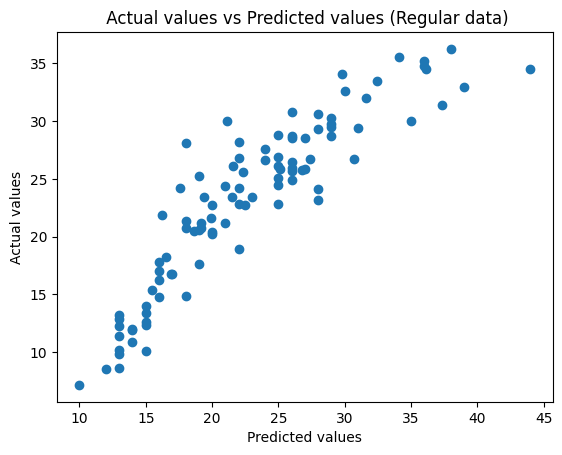

In [41]:
y_pred = LR.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title(" Actual values vs Predicted values (Regular data)")
plt.show()


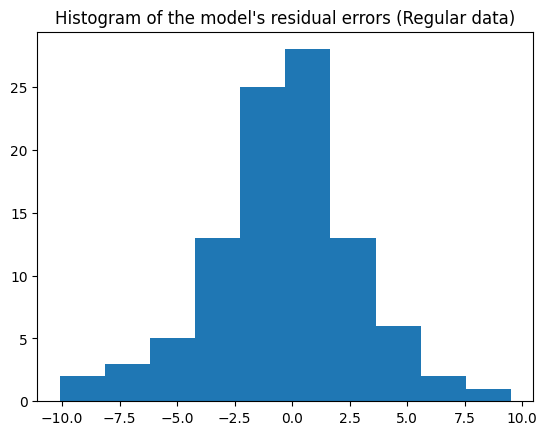

In [42]:
plt.hist(y_test - y_pred)
plt.title("Histogram of the model's residual errors (Regular data)")
plt.show()

###Cross validation: evaluating the robustness of the model

In [43]:
from sklearn.model_selection import cross_val_score

CVsc = cross_val_score(LR, X_train, y_train, cv = 10)

CVsc


array([0.81883634, 0.81510537, 0.80607933, 0.73539262, 0.78738037,
       0.79023824, 0.86824737, 0.7622652 , 0.84483926, 0.86961599])

In [44]:
CVsc.mean()


0.8098000094768565

In [45]:
CVsc.std()

0.041263495334475715

CV score of model: 0.81 +/- 0.04

In [46]:
from sklearn.model_selection import cross_val_score

CVsc= cross_val_score(LR, X, y, cv = 10)

CVsc

print(CVsc.mean())
print(CVsc.std())

0.6426040546895858
0.20656752425794944


CV score of entire dataset: 0.64 +/- 0.21



###Standardized data

In [123]:
# Standard Scaling
from sklearn.linear_model import LinearRegression

LRStd = LinearRegression()
LRStd.fit(X_train_std, y_train)

LScoreStd = LRStd.score(X_test_std, y_test)
print('R2 score of standardized data: ', LScoreStd)


R2 score of standardized data:  0.798890887286982


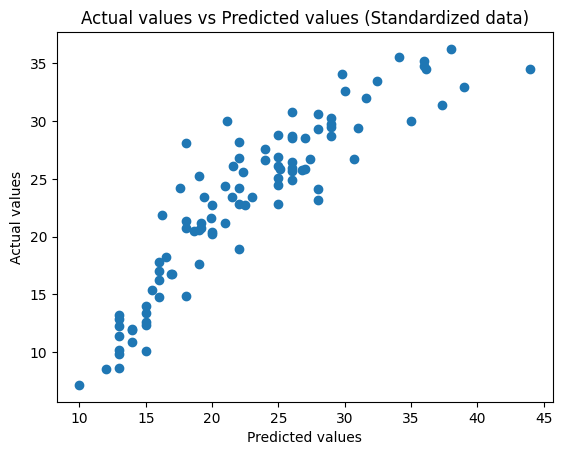

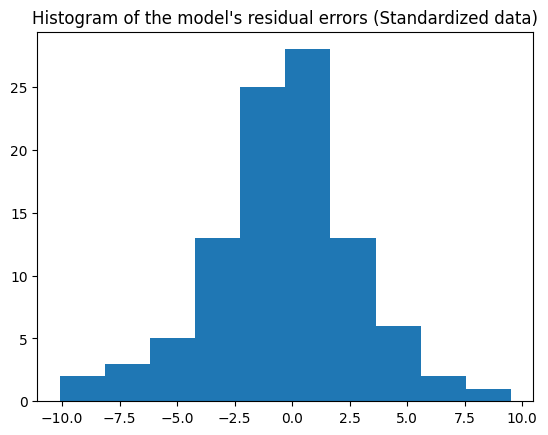

In [48]:
y_pred_std = LRStd.predict(X_test_std)

plt.scatter(y_test, y_pred_std)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Actual values vs Predicted values (Standardized data)")
plt.show()
print('\n')

plt.hist(y_test - y_pred_std)
plt.title("Histogram of the model's residual errors (Standardized data)")
plt.show()

In [125]:
from sklearn.model_selection import cross_val_score

CVsc_std = cross_val_score(LRStd, X_train_std, y_train, cv = 10)

CVsc_std

array([0.81883634, 0.81510537, 0.80607933, 0.73539262, 0.78738037,
       0.79023824, 0.86824737, 0.7622652 , 0.84483926, 0.86961599])

In [50]:
CVsc_std.mean()


0.8098000094768567

In [51]:
CVsc_std.std()

0.04126349533447642

CV score of standrardized model: 0.81 +/- 0.04



###PCA reduced data

In [52]:
from sklearn.linear_model import LinearRegression

LRPCA = LinearRegression()
LRPCA.fit(X_train_pca, y_train)


LRPCA_sc = LRPCA.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', LRPCA_sc )

R2 score of PCA reduced data:  0.7540019357925587


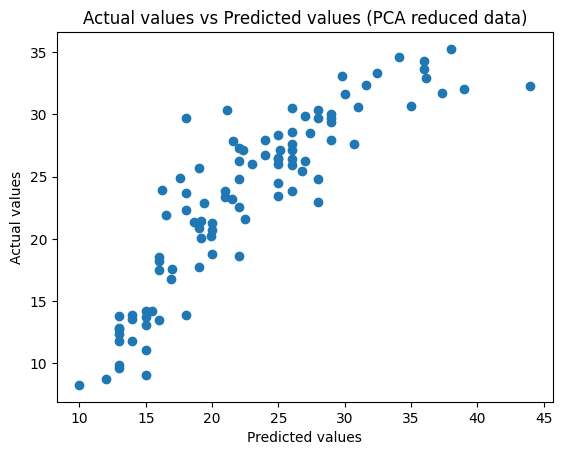

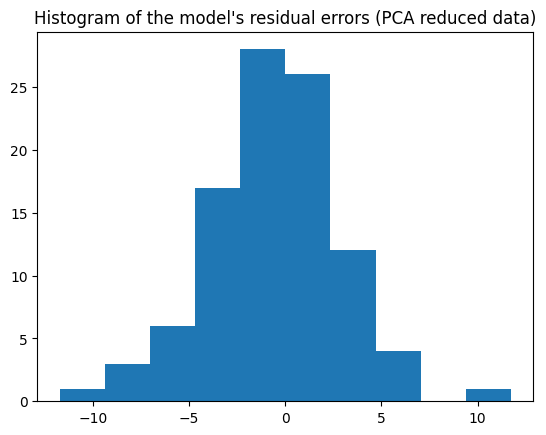

In [53]:
y_pred_pca = LRPCA.predict(X_test_pca)

plt.scatter(y_test, y_pred_pca)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Actual values vs Predicted values (PCA reduced data)")
plt.show()
print('\n')

plt.hist(y_test - y_pred_pca)
plt.title("Histogram of the model's residual errors (PCA reduced data)")
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score

scores_pca = cross_val_score(LRPCA, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', scores_pca.mean(), '+/-', scores_pca.std())

CV score of PCA reduced model: 0.7879570765274106 +/- 0.05358772930830503


##**Regularizaton: Method to resolve overfitting**

###Regular Data

In [126]:
# L1-Regularization
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1, random_state = 42)
lasso.fit(X_train, y_train)

lassosc = lasso.score(X_test, y_test)
print('Lasso Score of regular data:', lassosc)

Lasso Score of regular data: 0.7976667768749909


In [127]:
#Training accuracy

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha = 0.1)

cv_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print('CV score of Lasso model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Lasso model: 0.8102056233282484 +/- 0.044353483893364624


In [128]:
# L2-Regularization
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge.fit(X_train, y_train)

ridgesc = ridge.score(X_test, y_test)
print('Ridge Score of regular data:', ridgesc)

Ridge Score of regular data: 0.7990253547730505


In [112]:
#Training accuracy

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ridge, X_train, y_train, cv = 10)

print('CV score of Ridge model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Ridge model: 0.809844428069445 +/- 0.04138764747125511


In [129]:
# Elastic Net: L1 + L2
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elnet.fit(X_train, y_train)

elnetsc = elnet.score(X_test, y_test)
print('ElasticNet score of regular data:', elnetsc)

ElasticNet score of regular data: 0.7996378546043167


In [120]:
#Training accuracy

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(elnet, X_train, y_train, cv = 10)

print('CV score of ElasticNet model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of ElasticNet model: 0.8098970263248063 +/- 0.0442810343710217


###Standardized data

In [130]:
print("Standardized data\n")
# L1
from sklearn.linear_model import Lasso

lasso_std = Lasso(alpha = 0.1, random_state = 42)
lasso_std.fit(X_train_std, y_train)

lassosc_std = lasso_std.score(X_test_std, y_test)
print('Lasso Score:', lassosc_std)

# L2
from sklearn.linear_model import Ridge

ridge_std = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_std.fit(X_train_std, y_train)

ridgesc_std = ridge_std.score(X_test_std, y_test)
print('Ridge Score:', ridgesc_std)

# Elastic Net
from sklearn.linear_model import ElasticNet

elnet_std = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elnet_std.fit(X_train_std, y_train)

elnetsc_std = elnet_std.score(X_test_std, y_test)
print('ElasticNet score:', elnetsc_std)

Standardized data

Lasso Score: 0.7944282199102781
Ridge Score: 0.7976058398848342
ElasticNet score: 0.788886980658066


In [62]:
# Training accuracy

# L1

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lasso_std, X_train_std, y_train, cv = 10)
print('CV score of Lasso model:', cv_scores.mean(), '+/-', cv_scores.std())

# L2

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ridge_std, X_train_std, y_train, cv = 10)
print('CV score of Ridge model:', cv_scores.mean(), '+/-', cv_scores.std())

# L3

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(elnet_std, X_train_std, y_train, cv = 10)
print('CV score of ElasticNet model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Lasso model: 0.8113134003442186 +/- 0.045151165052256685
CV score of Ridge model: 0.8100693512202227 +/- 0.04168156429118428
CV score of ElasticNet model: 0.8074635134627067 +/- 0.040897749058376336


###PCA reduced data

In [131]:
print("PCA reduced data\n")

# L1
from sklearn.linear_model import Lasso

lasso_pca = Lasso(alpha = 0.1, random_state = 42)
lasso_pca.fit(X_train_pca, y_train)

lassosc_pca = lasso_pca.score(X_test_pca, y_test)
print('Lasso Score:', lassosc_pca)

# L2
from sklearn.linear_model import Ridge

ridge_pca = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_pca.fit(X_train_pca, y_train)

ridgesc_pca = ridge_pca.score(X_test_pca, y_test)
print('Ridge Score:', ridgesc_pca)

# Elastic Net
from sklearn.linear_model import ElasticNet

elnet_pca = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elnet_pca.fit(X_train_pca, y_train)

elnetsc_pca = elnet_pca.score(X_test_pca, y_test)
print('ElasticNet score:', elnetsc_pca)

PCA reduced data

Lasso Score: 0.7524750518117207
Ridge Score: 0.7541838209622151
ElasticNet score: 0.7553095427854379


In [132]:
# Training accuracy

# L1

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lasso_pca, X_train_pca, y_train, cv = 10)
print('CV score of Lasso model:', cv_scores.mean(), '+/-', cv_scores.std())

# L2

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ridge_pca, X_train_pca, y_train, cv = 10)
print('CV score of Ridge model:', cv_scores.mean(), '+/-', cv_scores.std())

# L3

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(elnet_pca, X_train_pca, y_train, cv = 10)
print('CV score of Elastic Net model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Lasso model: 0.7874287588856392 +/- 0.049902938106662235
CV score of Ridge model: 0.7880232953177015 +/- 0.05334050517178408
CV score of Elastic Net model: 0.7879623888169068 +/- 0.049044660606572824


##**Polynomial Regression**

In [134]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly = train_test_split(X_poly, test_size=0.25, random_state=42)

from sklearn.linear_model import LinearRegression

polyR = LinearRegression()
polyR.fit(X_train_poly, y_train)

polyRsc = polyR.score(X_test_poly, y_test)
print('R2 score of regular data:', polyRsc)

R2 score of regular data: 0.8589493832283672


In [135]:
poly_std = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_std = poly_std.fit_transform(X_std)

X_train_poly_std, X_test_poly_std = train_test_split(X_poly_std, test_size = 0.25, random_state = 42)

polyR_std = LinearRegression()
polyR_std.fit(X_train_poly_std, y_train)

polyRsc_std = polyR_std.score(X_test_poly_std, y_test)
print('R2 score of standardized data:', polyRsc_std)

R2 score of standardized data: 0.8589493832263562


In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_pca = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_pca = poly_pca.fit_transform(X_pca)

X_train_poly_pca, X_test_poly_pca = train_test_split(X_poly_pca, test_size = 0.25, random_state = 42)

polyR_pca = LinearRegression()
polyR_pca.fit(X_train_poly_pca, y_train)

polyRsc_std_pca = polyR_pca.score(X_test_poly_pca, y_test)
print('R2 score of PCA reduced data:', polyRsc_std_pca)

R2 score of PCA reduced data: 0.8666281843663011


In [68]:
# Training accuracy

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(polyR, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(polyR_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(polyR_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.8098000094768565 +/- 0.041263495334475715
CV score of Standardized model: 0.8098000094768567 +/- 0.04126349533447642
CV score of PCA reduced model: 0.7879570765274106 +/- 0.05358772930830503


##**SVM**

###**SVR with kernels: linear, polynomial, and rbf**

###Linear Kernel

In [137]:
print("Linear Kernel\n")
from sklearn.svm import SVR

# Regular data

svrL = SVR(kernel = 'linear')
svrL.fit(X_train, y_train)

svrLsc = svrL.score(X_test, y_test)
print('R2 score of regular data: ', svrLsc)


# Standardized data

svrL_std = SVR(kernel = 'linear')
svrL_std.fit(X_train_std, y_train)

svrLsc_std = svrL_std.score(X_test_std, y_test)
print('R2 score of standrardized data: ', svrLsc_std)

# PCA reduced data

svrL_pca = SVR(kernel = 'linear')
svrL_pca.fit(X_train_pca, y_train)

svrLsc_pca = svrL_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', svrLsc_pca)


Linear Kernel

R2 score of regular data:  0.6626344429353861
R2 score of standrardized data:  0.7803959546531063
R2 score of PCA reduced data:  0.7484203677634447


In [70]:
# Training accuracy for Linear Kernel

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svrL, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(svrL_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(svrL_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.5945186010161079 +/- 0.16244801627195232
CV score of Standardized model: 0.8000779287396718 +/- 0.04558675902460143
CV score of PCA reduced model: 0.7814353946934328 +/- 0.05643938844648777


###Polynomial Kernel

In [138]:
print("Polynomial Kernel\n")

from sklearn.svm import SVR

# Regular data

svrP = SVR(kernel = 'poly', degree = 2)
svrP.fit(X_train, y_train)

svrPsc = svrP.score(X_test, y_test)
print('R2 score of regular data: ', svrPsc)

#standardized data
svrP_std = SVR(kernel = 'poly', degree = 2)
svrP_std.fit(X_train_std, y_train)

svrPsc_std = svrP_std.score(X_test_std, y_test)
print('R2 score of standardized data: ', svrPsc_std)

#PCA reduced
svrP_pca = SVR(kernel = 'poly', degree = 2)
svrP_pca.fit(X_train_pca, y_train)

svrPsc_pca = svrP_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', svrPsc_pca)


Polynomial Kernel

R2 score of regular data:  0.6579830253884889
R2 score of standardized data:  0.346144246374533
R2 score of PCA reduced data:  0.2661154010946981


In [72]:
# Training accuracy for Polynomial Kernel

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svrP, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(svrP_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(svrP_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.6404596352936835 +/- 0.06996740476652724
CV score of Standardized model: 0.29653799386192736 +/- 0.10261047493897021
CV score of PCA reduced model: 0.21677550483783298 +/- 0.09963091725292822


###RBF Kernel

In [139]:
print('RBF Kernel\n')

# Reg data
svrRBF = SVR(kernel = 'rbf')
svrRBF.fit(X_train, y_train)

svrRBFsc = svrRBF.score(X_test, y_test)
print('R2 score of regular data: ', svrRBFsc)

#standardized data
svrRBF_std = SVR(kernel = 'rbf')
svrRBF_std.fit(X_train_std, y_train)

svrRBFsc_std = svrRBF_std.score(X_test_std, y_test)
print('R2 score of standardized data: ', svrRBFsc_std)

#PCA reduced
svrRBF_pca = SVR(kernel = 'rbf')
svrRBF_pca.fit(X_train_pca, y_train)

svrRBFsc_pca = svrRBF_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', svrRBFsc_pca)


RBF Kernel

R2 score of regular data:  0.7102030559488015
R2 score of standardized data:  0.8209935120539685
R2 score of PCA reduced data:  0.8190764424356886


In [74]:
# Training accuracy for RBF Kernel

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svrRBF, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(svrRBF_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(svrRBF_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.7012425467204537 +/- 0.07929292814032703
CV score of Standardized model: 0.8347493182260568 +/- 0.05345007295891266
CV score of PCA reduced model: 0.8294173898925348 +/- 0.05459477420359437


## **Decision Tree**

In [141]:
from sklearn.tree import DecisionTreeRegressor

print("Decision Tree\n")

# Regular data
DTR = DecisionTreeRegressor(max_leaf_nodes = 32, random_state = 42)
DTR.fit(X_train, y_train)

DTRsc = DTR.score(X_test, y_test)
print('R2 score of regular data: ', DTRsc)

# Standardized data
DTR_std = DecisionTreeRegressor(max_leaf_nodes = 32, random_state = 42)
DTR_std.fit(X_train_std, y_train)

DTRsc_std = DTR_std.score(X_test_std, y_test)
print('R2 score of standardized data: ', DTRsc_std)

# PCA reduced data
DTR_pca = DecisionTreeRegressor(max_leaf_nodes = 32, random_state = 42)
DTR_pca.fit(X_train_pca, y_train)

DTRsc_pca = DTR_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', DTRsc_pca)

Decision Tree

R2 score of regular data:  0.8077493898600785
R2 score of standardized data:  0.8077493898600785
R2 score of PCA reduced data:  0.6761493557111735


In [144]:
# Training accuracy for Decision Tree

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(DTR, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(DTR_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(DTR_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.7902699045449595 +/- 0.07133062238701596
CV score of Standardized model: 0.7902699045449595 +/- 0.07133062238701596
CV score of PCA reduced model: 0.6761780460784608 +/- 0.157255085678348


Decision Trees are indifferent to standardisation or any sort of feature scaling

##**Random Forest**

In [145]:
from sklearn.ensemble import RandomForestRegressor

print("Random Forest\n")

# Regular data
RFR = RandomForestRegressor(n_estimators = 100, max_leaf_nodes = 32, n_jobs = -1, random_state = 42)
RFR.fit(X_train, y_train)

RFRsc = RFR.score(X_test, y_test)
print('R2 score of regular data: ', RFRsc)

# Standardized data
RFR_std = RandomForestRegressor(n_estimators = 100, max_leaf_nodes = 32, n_jobs = -1, random_state = 42)
RFR_std.fit(X_train_std, y_train)

RFRsc_std = RFR_std.score(X_test_std, y_test)
print('R2 score of standardized data: ', RFRsc_std)

# PCA Reduced data
RFR_pca = RandomForestRegressor(n_estimators = 100, max_leaf_nodes = 32, n_jobs = -1, random_state = 42)
RFR_pca.fit(X_train_pca, y_train)

RFRsc_pca = RFR_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', RFRsc_pca)

Random Forest

R2 score of regular data:  0.8742778138657534
R2 score of standardized data:  0.8745500405394342
R2 score of PCA reduced data:  0.860222278953527


In [78]:
# Training accuracy for Random Forest

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RFR, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(RFR_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(RFR_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.8585241017455395 +/- 0.04463758305933999
CV score of Standardized model: 0.8584581709134035 +/- 0.044741315672288645
CV score of PCA reduced model: 0.8330067624709075 +/- 0.05156124903386631


##**AdaBoost**

In [79]:
print("AdaBoost\n")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Regular data
adaR = AdaBoostRegressor(DecisionTreeRegressor(max_leaf_nodes = 32), n_estimators = 100, learning_rate = 0.5, random_state = 42)
adaR.fit(X_train, y_train)

adaRsc = adaR.score(X_test, y_test)
print('R2 score of regular data: ', adaRsc)

# Standardized data
adaR_std = AdaBoostRegressor(DecisionTreeRegressor(max_leaf_nodes = 32), n_estimators = 100, learning_rate = 0.5, random_state = 42)
adaR_std.fit(X_train_std, y_train)

adaRsc_std = adaR_std.score(X_test_std, y_test)
print('R2 score of standardized data: ', adaRsc_std)

# PCA Reduced data
adaR_pca = AdaBoostRegressor(DecisionTreeRegressor(max_leaf_nodes = 32), n_estimators = 100, learning_rate = 0.5, random_state = 42)
adaR_pca.fit(X_train_pca, y_train)

adaRsc_pca = adaR_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', adaRsc_pca)

AdaBoost

R2 score of regular data:  0.8847129235449682
R2 score of standardized data:  0.881987536007458
R2 score of PCA reduced data:  0.8743430966654674


In [80]:
# Training accuracy for AdapativeBoosting

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(adaR, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(adaR_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(adaR_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.854977338219596 +/- 0.048540171250264885
CV score of Standardized model: 0.8576495751634475 +/- 0.04729878741978559
CV score of PCA reduced model: 0.8188734409873912 +/- 0.06462310474636518


##**GradientBoost**

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
print("Gradient Boosting\n")

# Regular data
gbR = GradientBoostingRegressor(max_leaf_nodes = 32, n_estimators = 100, learning_rate = 0.5, random_state = 42)
gbR.fit(X_train, y_train)

gbRsc = gbR.score(X_test, y_test)
print('R2 score of regular data: ', gbRsc)

# Standardized data
gbR_std = GradientBoostingRegressor(max_leaf_nodes = 32, n_estimators = 100, learning_rate = 0.5, random_state = 42)
gbR_std.fit(X_train_std, y_train)

gbRsc_std = gbR_std.score(X_test_std, y_test)
print('R2 score of standardized data: ', gbRsc_std)

# PCA Reduced data
gbR_pca = GradientBoostingRegressor(max_leaf_nodes = 32, n_estimators = 100, learning_rate = 0.5, random_state = 42)
gbR_pca.fit(X_train_pca, y_train)

gbRsc_pca = gbR_pca.score(X_test_pca, y_test)
print('R2 score of PCA reduced data: ', gbRsc_pca)

Gradient Boosting

R2 score of regular data:  0.8453715021388497
R2 score of standardized data:  0.848568403782159
R2 score of PCA reduced data:  0.8070889193313175


In [82]:
# Training accuracy for GradientBoosting

# Regular

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gbR, X_train, y_train, cv = 10)
print('CV score of Regular model:', cv_scores.mean(), '+/-', cv_scores.std())

# Standardized

cv_scores = cross_val_score(gbR_std, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

# PCA reduced

cv_scores = cross_val_score(gbR_pca, X_train_pca, y_train, cv = 10)
print('CV score of PCA reduced model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Regular model: 0.8474069198387986 +/- 0.049429312692909066
CV score of Standardized model: 0.8456366858408841 +/- 0.049706541274652315
CV score of PCA reduced model: 0.8171593198049314 +/- 0.06548738012471672


##**Hyperparameter Tuning**

We utilize that standardized dataset to ensure the fairness and consistency while comparing different model configurations and their performances

###SVM with RBF kernel

In [83]:
# Base estimator
from sklearn.svm import SVR

hpt_svm_rbf = SVR(kernel = 'rbf')
hpt_svm_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [150]:
# Parameter grid for tuning
import numpy as np

hpt_param_grid_svmrbf = [
    {
     'C':[i for i in range(1,10)],
     'gamma': np.linspace(0.1, 1, 10),
     'epsilon':[j for j in range(0,10)],
     }
     ]

In [151]:
hpt_param_grid_svmrbf

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  'epsilon': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [152]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_svm_rbf,
                           param_grid = hpt_param_grid_svmrbf,
                           cv = 5)

grid_search.fit(X_train_std, y_train)
print('The best estimators for SVM with RBF kernel (SVR):', grid_search.best_estimator_)
print('The best R2 score for SVM with RBF kernel (SVR):', grid_search.best_score_)

The best estimators for SVM with RBF kernel (SVR): SVR(C=9, epsilon=1, gamma=0.2)
The best R2 score for SVM with RBF kernel (SVR): 0.8708278284655335


In [153]:
svrRBF_std_hp = SVR(kernel = 'rbf', C = 9, epsilon = 1, gamma = 0.2)
svrRBF_std_hp.fit(X_train, y_train)

svrRBFsc_std_hp = svrRBF_std_hp.score(X_test, y_test)
print('R2 score of 25% testing data: ', svrRBFsc_std_hp)

R2 score of 25% testing data:  -0.002159972721777592


In [89]:
# Training accuracy for Hyper Parameter tuned SVM model with RBF kernel

cv_scores = cross_val_score(svrRBF_std_hp, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())


CV score of Standardized model: 0.8760897727335604 +/- 0.0386644448857064


###Decision Trees

In [90]:
hpt_dt = DecisionTreeRegressor(random_state = 42)
hpt_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [91]:
# Parameter grid for tuning

hpt_param_grid_dt = [
    {
    'max_leaf_nodes': [10, 20, 30, 40],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
    }
]

hpt_param_grid_dt

[{'max_leaf_nodes': [10, 20, 30, 40],
  'max_depth': [5, 10, 15],
  'min_samples_split': [2, 5, 10]}]

In [92]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_dt,
                           param_grid = hpt_param_grid_dt,
                           cv = 5)

grid_search.fit(X_train_std, y_train)
print('The best estimators for Decision Trees:', grid_search.best_estimator_)
print('The best R2 score for Decision Trees:', grid_search.best_score_)

The best estimators for Decision Trees: DecisionTreeRegressor(max_depth=5, max_leaf_nodes=30, min_samples_split=10,
                      random_state=42)
The best R2 score for Decision Trees: 0.8172823526866762


In [93]:
DTR_std_hp = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=30, min_samples_split=10,
                      random_state=42)
DTR_std_hp.fit(X_train_std, y_train)

DTRsc_std_hp = DTR_std_hp.score(X_test_std, y_test)
print('R2 score of 25% testing data: ', DTRsc_std_hp)

R2 score of 25% testing data:  0.8178987872769241


In [94]:
# Training accuracy for Hyper Parameter tuned Decision Tree model

cv_scores = cross_val_score(DTR_std_hp, X_train_std, y_train, cv=10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Standardized model: 0.7999140794774294 +/- 0.058971257286480346


###RandomForest

In [95]:
hpt_rf = RandomForestRegressor(n_jobs = -1, random_state = 42)
hpt_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [96]:
# Parameter grid for tuning

hpt_param_grid_rf = [
    {
        'max_leaf_nodes': [10, 15, 20, 30, 40],
        'n_estimators': [50, 100, 150, 200],
        'n_jobs': [-1],
        'random_state': [42]
    }
]

hpt_param_grid_rf

[{'max_leaf_nodes': [10, 15, 20, 30, 40],
  'n_estimators': [50, 100, 150, 200],
  'n_jobs': [-1],
  'random_state': [42]}]

In [97]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_rf,
                           param_grid = hpt_param_grid_rf,
                           cv = 5)

grid_search.fit(X_train_std, y_train)
print('The best estimators for Random Forest:', grid_search.best_estimator_)
print('The best R2 score for Random Forest:', grid_search.best_score_)

The best estimators for Random Forest: RandomForestRegressor(max_leaf_nodes=40, n_estimators=200, n_jobs=-1,
                      random_state=42)
The best R2 score for Random Forest: 0.8634273335519678


In [98]:
RFR_std_hp = RandomForestRegressor(n_estimators = 200, max_leaf_nodes = 40, n_jobs = -1, random_state = 42)
RFR_std_hp.fit(X_train_std, y_train)

RFRsc_std_hp = RFR_std_hp.score(X_test_std, y_test)
print('R2 score of 25% testing data data: ', RFRsc_std_hp)

R2 score of 25% testing data data:  0.8758176638887478


In [99]:
# Training accuracy for Hyper Parameter tuned Random Forest model

cv_scores = cross_val_score(RFR_std_hp, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Standardized model: 0.8604754349748308 +/- 0.04484463084272776


###AdaBoost


In [100]:
hpt_ab = AdaBoostRegressor(DecisionTreeRegressor(), random_state = 42)
hpt_ab.get_params()

{'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [101]:
# Parameter grid for tuning

hpt_param_grid_ab = [
    {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_leaf': [1, 5, 10]
    }
]

hpt_param_grid_ab

[{'learning_rate': [0.01, 0.1, 0.5, 1],
  'estimator__max_depth': [5, 10, 15],
  'estimator__min_samples_leaf': [1, 5, 10]}]

In [102]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_ab,
                           param_grid = hpt_param_grid_ab,
                           cv = 5)

grid_search.fit(X_train_std, y_train)
print('The best estimators for AdaBoost:', grid_search.best_estimator_)
print('The best R2 score for AdaBoost:', grid_search.best_score_)

The best estimators for AdaBoost: AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                  min_samples_leaf=5),
                  learning_rate=0.01, random_state=42)
The best R2 score for AdaBoost: 0.8607966495491809


In [103]:
adaR_std_hp = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                  min_samples_leaf=5),
                  learning_rate=0.01, random_state=42)
adaR_std_hp.fit(X_train_std, y_train)

adaRsc_std_hp = adaR_std_hp.score(X_test_std, y_test)
print('R2 score of 25% testing data: ', adaRsc_std_hp)

R2 score of 25% testing data:  0.8857901626630696


In [128]:
# Training accuracy for Hyper Parameter tuned AdaptiveBoosting model

cv_scores = cross_val_score(adaR_std_hp, X_train_std, y_train, cv=10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Standardized model: 0.8554151880557728 +/- 0.04427979655004686


###GradientBoosting

In [104]:
hpt_gb = GradientBoostingRegressor(random_state = 42)
hpt_gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [105]:
# Parameter grid for tuning

hpt_param_grid_gb = [
    {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_leaf_nodes': [10, 15, 20],
    }
]

hpt_param_grid_gb

[{'learning_rate': [0.01, 0.1, 0.5, 1],
  'n_estimators': [50, 100, 150, 200, 250],
  'max_leaf_nodes': [10, 15, 20]}]

In [106]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_gb,
                           param_grid = hpt_param_grid_gb,
                           cv = 5)

grid_search.fit(X_train_std, y_train)
print('The best estimators for GradientBoost:', grid_search.best_estimator_)
print('The best R2 score for GradientBoost:', grid_search.best_score_)

The best estimators for GradientBoost: GradientBoostingRegressor(max_leaf_nodes=10, n_estimators=200, random_state=42)
The best R2 score for GradientBoost: 0.8759263356768365


In [107]:
gbR_std_hp = GradientBoostingRegressor(max_leaf_nodes = 10, n_estimators = 200, random_state = 42)
gbR_std_hp.fit(X_train_std, y_train)

gbRsc_std_hp = gbR_std.score(X_test_std, y_test)
print('R2 score of 25% testing data: ', gbRsc_std_hp)

R2 score of 25% testing data:  0.848568403782159


In [108]:
# Training accuracy for Hyper Parameter tuned GradientBoosting model

cv_scores = cross_val_score(gbR_std_hp, X_train_std, y_train, cv = 10)
print('CV score of Standardized model:', cv_scores.mean(), '+/-', cv_scores.std())

CV score of Standardized model: 0.8701785537685509 +/- 0.0427743411454075


##**Comparisons of before and after hyper-parameter tuning**

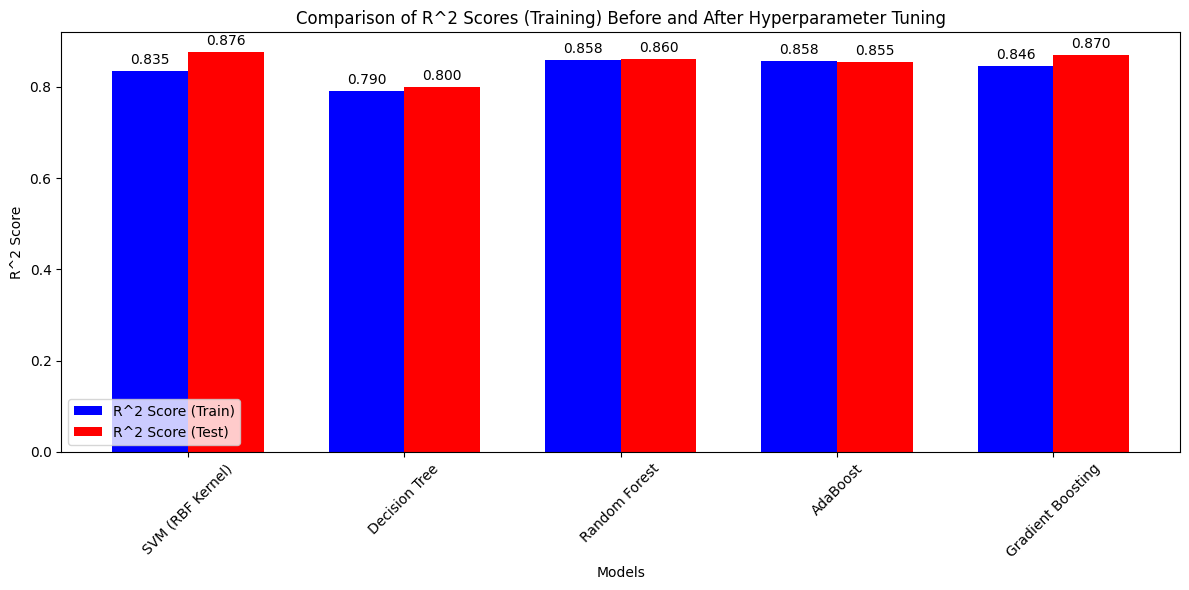

In [154]:
# Model accuracy

import matplotlib.pyplot as plt
import numpy as np

models = ['SVM (RBF Kernel)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
r2_train_before = [0.8347, 0.7902, 0.8584, 0.8576, 0.8456]
r2_train_after = [0.8760, 0.7999, 0.8604, 0.8554, 0.8701]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(index, r2_train_before, bar_width, label='R^2 Score (Train)', color='b')
bars2 = ax.bar(index + bar_width, r2_train_after, bar_width, label='R^2 Score (Test)', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('R^2 Score')
ax.set_title('Comparison of R^2 Scores (Training) Before and After Hyperparameter Tuning')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend(loc='lower left')

# Annotating the bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


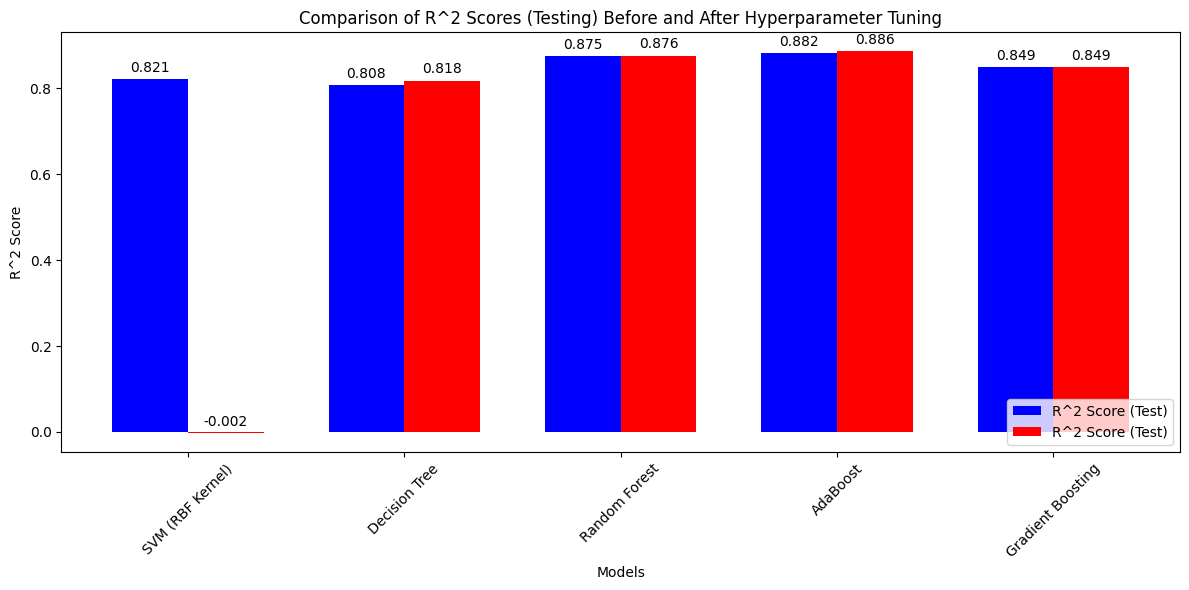

In [155]:
# Model generalization with 25% testing data

import matplotlib.pyplot as plt
import numpy as np

models = ['SVM (RBF Kernel)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
r2_test_before = [0.8209, 0.8077, 0.8745, 0.8819, 0.8485]
r2_test_after = [-0.0021, 0.8178, 0.8758, 0.8857, 0.8485]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(index, r2_test_before, bar_width, label='R^2 Score (Test)', color='b')
bars2 = ax.bar(index + bar_width, r2_test_after, bar_width, label='R^2 Score (Test)', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('R^2 Score')
ax.set_title('Comparison of R^2 Scores (Testing) Before and After Hyperparameter Tuning')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend(loc='lower right')

# Annotating the bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


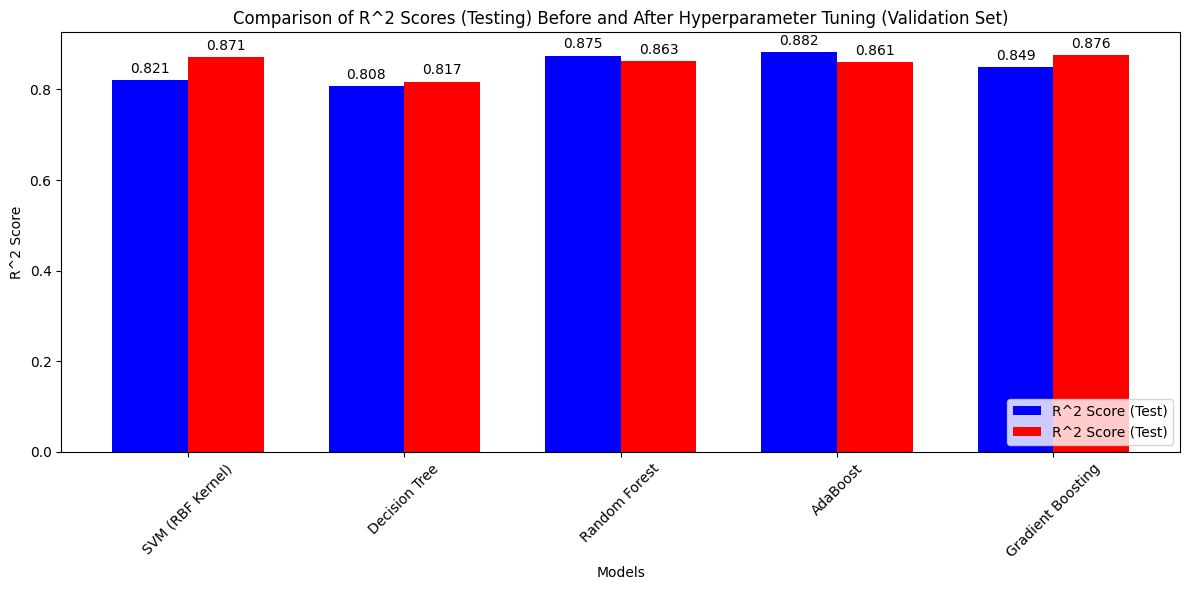

In [156]:
# Model generalization with 25% testing data and validation set from cross validation

import matplotlib.pyplot as plt
import numpy as np

models = ['SVM (RBF Kernel)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
r2_test2_before = [0.8209, 0.8077, 0.8745, 0.8819, 0.8485]
r2_test2_after = [0.8708, 0.8172, 0.8634, 0.8607, 0.8759]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(index, r2_test2_before, bar_width, label='R^2 Score (Test)', color='b')
bars2 = ax.bar(index + bar_width, r2_test2_after, bar_width, label='R^2 Score (Test)', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('R^2 Score')
ax.set_title('Comparison of R^2 Scores (Testing) Before and After Hyperparameter Tuning (Validation Set)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend(loc='lower right')

# Annotating the bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


##**Feature Reduction**

In [109]:
# Use initially created dataset X_pca and fitting it to the best model from hyperparameter tuning
X_train_pca = X_train_pca
X_test_pca = X_test_pca


AdaR_std_fr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                  min_samples_leaf=5),
                  learning_rate=0.01, random_state=42)
AdaR_std_fr.fit(X_train_pca, y_train)


AdaRsc_std_fr = AdaR_std_fr.score(X_test_pca, y_test)
print('R2 score of PCA reduced data trained on the AdaBoost model:', AdaRsc_std_fr)


R2 score of PCA reduced data trained on the AdaBoost model: 0.8768807147837259


##**Feature Selection**

In [113]:
from sklearn.feature_selection import SelectPercentile, f_classif

Percentile_Selector = SelectPercentile(score_func=f_classif, percentile=50)
X_P50 = Percentile_Selector.fit_transform(X,y)

print(X_P50.shape)

(392, 3)


In [114]:
 selft = Percentile_Selector.get_feature_names_out()
 selft

array(['cylinders', 'displacement', 'weight'], dtype=object)

In [149]:
X_train_selected = Percentile_Selector.transform(X_train)
X_test_selected = Percentile_Selector.transform(X_test)

AdaR_std_fs = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                  min_samples_leaf=5),
                  learning_rate=0.01, random_state=42)
AdaR_std_fs.fit(X_train_selected, y_train)

AdaRsc_std_fs = AdaR_std_fs.score(X_test_selected, y_test)
print('R2 score of standardized data with feature selection:', AdaRsc_std_fs)


R2 score of standardized data with feature selection: 0.6428513026978178
